# Deep Learning with Pytorch Tutorial Notebook
[Video link to tutorial](https://www.youtube.com/watch?v=c36lUUr864M&ab_channel=PythonEngineer)

# Tutorial 2 - Tensor Basics
---

## Making tensors

In [28]:
import torch

# create an empty tensor with dimensions (x,y,z)
x = torch.empty(2, 2,3)
print(x)

tensor([[[7.0368e+28, 3.3127e-18, 2.5750e-12],
         [7.1856e+22, 1.8609e+34, 1.8179e+31]],

        [[1.8524e+28, 9.6647e+35, 2.0076e+29],
         [7.3185e+28, 6.1948e-04, 1.1513e-38]]])


In [22]:
# create a tensor with random values 
y = torch.rand(2,3)
print(y)

tensor([[0.3311, 0.2828, 0.0576],
        [0.9699, 0.7240, 0.9702]])


In [30]:
# create a tensor with zeros
y = torch.zeros(2,3)
print(y)

# create a tensor with ones
z = torch.ones(2,2)
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.]])


In [32]:
# choose the data type for the tensor
x = torch.ones(2,2, dtype=torch.int)
print(x.dtype)

# choose the data type for the tensor
x = torch.ones(2,2, dtype=torch.float)
print(x.dtype)

torch.int32
torch.float32


In [33]:
# looking at the size of a tensor
print(x.size())

torch.Size([2, 2])


In [35]:
# making a tensor from a list
x = torch.tensor([2.5, 0.1])
print(x)

tensor([2.5000, 0.1000])


## Operations on tensors

In [56]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

tensor([[0.3962, 0.5326],
        [0.8929, 0.5876]])
tensor([[0.2162, 0.8210],
        [0.6164, 0.3422]])


In [57]:
# addition method 1
z = x + y
print(f'z = {z}')

# addition method 2
z = torch.add(x,y)
print(f'z = {z}')

# addition method 3
y.add_(x) # this modifies the variable it's applied on 
print(y)

z = tensor([[0.6124, 1.3536],
        [1.5093, 0.9297]])
z = tensor([[0.6124, 1.3536],
        [1.5093, 0.9297]])
tensor([[0.6124, 1.3536],
        [1.5093, 0.9297]])


In [58]:
# subtraction 
z = x - y
z = torch.sub(x,y)
print(f'z = {z}')

# multiplication
z = torch.mul(x,y)
print(f'z = {z}')

# division
z = torch.div(x,y)
print(f'z = {z}')

z = tensor([[-0.2162, -0.8210],
        [-0.6164, -0.3422]])
z = tensor([[0.2426, 0.7209],
        [1.3476, 0.5463]])
z = tensor([[0.6470, 0.3935],
        [0.5916, 0.6320]])


In [59]:
# slicing operations
a = torch.rand(5,3)
print(a)

# get all rows, first column
print(a[:, 0])

# get first row, all columns 
print(a[1, :])

# get element at 1,1 (returns a tensor)
print(a[1,1])

# get element at 1,1 and return item
print(a[1,1].item())

tensor([[0.4828, 0.6357, 0.5744],
        [0.8080, 0.7325, 0.3847],
        [0.4489, 0.0291, 0.1722],
        [0.8730, 0.6808, 0.6664],
        [0.9501, 0.3304, 0.3911]])
tensor([0.4828, 0.8080, 0.4489, 0.8730, 0.9501])
tensor([0.8080, 0.7325, 0.3847])
tensor(0.7325)
0.7325420379638672


In [63]:
# reshaping using view()
x = torch.rand(4,4)
print(x)
y = x.view(-1, 1)
print(y)

tensor([[0.3664, 0.6304, 0.6535, 0.6437],
        [0.2842, 0.8478, 0.9061, 0.5782],
        [0.0294, 0.8165, 0.2758, 0.7901],
        [0.0335, 0.3574, 0.0256, 0.0384]])
tensor([[0.3664],
        [0.6304],
        [0.6535],
        [0.6437],
        [0.2842],
        [0.8478],
        [0.9061],
        [0.5782],
        [0.0294],
        [0.8165],
        [0.2758],
        [0.7901],
        [0.0335],
        [0.3574],
        [0.0256],
        [0.0384]])


## Converting numpy to torch and vice versa
Note: when working only on the CPU, numpy arrays and pytorch tensors will share the same place in memory. Therefore, editing one will edit the other.

In [70]:
import numpy as np
a = torch.ones(5)
print(a)

# convert from torch to numpy
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [71]:
# convert from numpy to tensor
c = np.ones(5)
d = torch.from_numpy(c)
print(d)
print(type(d))

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
<class 'torch.Tensor'>


## Requires grad
This is a property of tensors that tells pytorch that the tensor will need to calculate gradients for optimization
Whenever you have a variable in your model that you want to optimize, you need to set this parameter to True

In [73]:
x = torch.ones(5, requires_grad = True)
print(x)

tensor([1., 1., 1., 1., 1.], requires_grad=True)


# Tutorial 3 - Autograd
## Gradient Computation
---

In [76]:
x = torch.randn(3, requires_grad = True)
print(x)

# whenever we do operations with a tensor that has requires_grad = True, pytorch will create a computational graph 
y = x+2
print(y)

tensor([-0.0072,  0.9425,  0.2594], requires_grad=True)
tensor([1.9928, 2.9425, 2.2594], grad_fn=<AddBackward0>)


Because the operation was an addition, pytorch creates a gradient function to use in backpropagation called "AddBackward" 

In [78]:
z = y*y*2
print(z)

tensor([ 7.9426, 17.3170, 10.2094], grad_fn=<MulBackward0>)


Here our gradient function is "MulBackward"

In [79]:
z = z.mean()
print(z)

tensor(11.8230, grad_fn=<MeanBackward0>)


Here our gradient function is "MeanBackward"

## Calculating the gradient of a tensor
By using the backward() function, we can calculate the derivative dz/dx <br>
The backward() function is computing the jacobian product (chain rule)

In [80]:
z.backward() # dz/dx
print(x.grad)

tensor([2.6571, 3.9234, 3.0125])


In the case where z is a scalar value, we can implicitly call the backward() function. <br>
However, when z is a vector, we must pass a vector into backward() for it to properly calculate the gradients

In [83]:
z = y*y*2
v = torch.tensor([0.1, 1.0, 0.001], dtype = torch.float32)
z.backward(v)
print(x.grad)

tensor([ 4.2513, 27.4636,  3.0306])


## How to prevent gradient tracking
This is useful for intermediate steps in an algorithm where we don't want to be calculating gradients and tracking the history of a gradient function

In [88]:
# first method
x.requires_grad_(False)
print(x)

# second method
x.detach()
print(x)

# third method
with torch.no_grad():
    # operations here
    print(x)

tensor([-0.0072,  0.9425,  0.2594])
tensor([-0.0072,  0.9425,  0.2594])
tensor([-0.0072,  0.9425,  0.2594])


### Dummy training example
This will be to visualize the issues that can arise if you don't prevent gradient tracking

In [93]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


You can see above that without resetting gradient values, the gradients are aggregated over time and give erroneous values for the gradients <br>
The gradients should remain at 3 (since we are doing the operatoin weights * 3), but they are aggregating instead

In [95]:
weights = torch.ones(4, requires_grad = True)

for epoch in range(3):
    model_output = (weights*3).sum()
    model_output.backward()
    
    print(weights.grad)
    
    # here we reset the gradients so that they don't carry over in each iteration, always providing the correct gradient of 3
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


Whenever we want to calculate gradients, we must set "requires_grad = True" within our tensor. <br>
Then, we can calculate the gradient by calling the "backward()" function <br>
And in each iteration of our optimization steps, we must call the "x.grad.zero_()" function

# Tutorial 4 - Backpropagation
---

## Chain Rule
Backpropagation is modeled under the idea that we have a lot of chained operations taking an initial input x and leading to a final output z, and we want to minimize the value of z. <br>
Say we have: <br>
x -> a(x) = y, y-> b(y) = z <br>
To compute dz/dx, we can use the chain rule as follows: <br>
dz/dx = dz/dy * dy/dx

## Computational Graph 
With every operation we do, pytorch computes a Computational Graph <br>
At each node, we apply one operation or function to get an output. <br>
These nodes compute "Local Gradients" which can later be used with the chain rule to compute a total gradient such as the dLoss / dx

## The steps of Backpropagation
1. **Forward pass**: Compute Loss
2. Compute **local gradients**
3. **Backward pass**: Compute dLoss / dWeights using the chain rule 

Lets do a simple example of backpropagation using a linear regression model, trying to optimize a weight to minimize the loss function <br>
x = 1, y = 2, w = 1

In [98]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad = True)

# forward pass, compute loss
y_hat = w * x
loss = (y_hat - y)**2
print(f'loss: {loss}')

# backward pass (this step actually includes steps 2 and 3 above, since it automatically computes local gradients)
loss.backward()
print(f'gradient: {w.grad}')

# update weights ...
# next forward and backward pass ...

loss: 1.0
gradient: -2.0


This is in a nutshell how backpropagation works, and this will be the backbone to algorithms such as gradient descent.

# Tutorial 5 - Gradient Descent using Autograd
---
In this tutorial, we will first set up a gradient descent pipeline manually, and then we'll see how we can replace the manual operations with autograd functions to achieve the same result. <br>
The model we'll be using is a linear regression model.
## Pipeline
1. Prediction *pytorch model*
2. **Gradients computation *autograd***
3. Loss Computation *Pytorch loss*
4. Parameter updates: *Pytorch optimizer*

## 1. Manual Gradient Descent
Using numpy

In [105]:
import numpy as np

# f = w * x

# f = 2 * x 
X = np.array([1, 2, 3, 4], dtype = np.float32)
Y = np.array([2, 4, 6, 8], dtype = np.float32)

w = 0.0

# model prediction 
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

# gradients
# MSE = 1 / N * (w*x - y)**2
# dJ/dw = 1 / N 2x (w*x - y)
def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred - y).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients
    dw = gradient(X, Y, y_pred)
    
    # update weights
    w -= learning_rate * dw
    
    print(f'epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch: 1, weight: 1.200, loss: 30.00000000
epoch: 2, weight: 1.680, loss: 4.79999924
epoch: 3, weight: 1.872, loss: 0.76800019
epoch: 4, weight: 1.949, loss: 0.12288000
epoch: 5, weight: 1.980, loss: 0.01966083
epoch: 6, weight: 1.992, loss: 0.00314570
epoch: 7, weight: 1.997, loss: 0.00050332
epoch: 8, weight: 1.999, loss: 0.00008053
epoch: 9, weight: 1.999, loss: 0.00001288
epoch: 10, weight: 2.000, loss: 0.00000206
epoch: 11, weight: 2.000, loss: 0.00000033
epoch: 12, weight: 2.000, loss: 0.00000005
epoch: 13, weight: 2.000, loss: 0.00000001
epoch: 14, weight: 2.000, loss: 0.00000000
epoch: 15, weight: 2.000, loss: 0.00000000
epoch: 16, weight: 2.000, loss: 0.00000000
epoch: 17, weight: 2.000, loss: 0.00000000
epoch: 18, weight: 2.000, loss: 0.00000000
epoch: 19, weight: 2.000, loss: 0.00000000
epoch: 20, weight: 2.000, loss: 0.00000000
prediction after training: f(5) = 10.000


## 2. Automatic Gradient Descent
Using pytorch

In [107]:
import torch

# f = w * x

# f = 2 * x 
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

# model prediction 
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()


print(f'prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass with autograd
    # this calculates dl/dw
    l.backward()
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad
    
    # zero gradients
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch: 1, weight: 0.300, loss: 30.00000000
epoch: 11, weight: 1.665, loss: 1.16278565
epoch: 21, weight: 1.934, loss: 0.04506890
epoch: 31, weight: 1.987, loss: 0.00174685
epoch: 41, weight: 1.997, loss: 0.00006770
epoch: 51, weight: 1.999, loss: 0.00000262
epoch: 61, weight: 2.000, loss: 0.00000010
epoch: 71, weight: 2.000, loss: 0.00000000
epoch: 81, weight: 2.000, loss: 0.00000000
epoch: 91, weight: 2.000, loss: 0.00000000
prediction after training: f(5) = 10.000


In this case, we've changed the training loop to compute gradients through the use of the "backward()" function which calculates dl/dw and saves the gradients in w.grad <br>
We also made sure to zero the gradients after every pass of the training loop to ensure no aggregation of gradients is done.

# Tutorial 6 - Training Pipeline
## Model / Loss / Optimizer
---
## Pipeline
1. **Prediction *pytorch model***
2. Gradients computation *autograd*
3. **Loss Computation *Pytorch loss***
4. **Parameter updates: *Pytorch optimizer***

## 3. Automatic Loss and Optimization
Using pytorch

## General PyTorch Pipeline
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop 
     - forward pass: compute prediction
     - backward pass: gradients
     - update weights

In [108]:
import torch
import torch.nn as nn

# f = w * x

# f = 2 * x 
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32)

w = torch.tensor(0.0, dtype = torch.float32, requires_grad = True)

# model prediction 
def forward(x):
    return w * x

print(f'prediction before training: f(5) = {forward(5):.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass with autograd
    # this calculates dl/dw
    l.backward()
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch: {epoch+1}, weight: {w:.3f}, loss: {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch: 1, weight: 0.300, loss: 30.00000000
epoch: 11, weight: 1.665, loss: 1.16278565
epoch: 21, weight: 1.934, loss: 0.04506890
epoch: 31, weight: 1.987, loss: 0.00174685
epoch: 41, weight: 1.997, loss: 0.00006770
epoch: 51, weight: 1.999, loss: 0.00000262
epoch: 61, weight: 2.000, loss: 0.00000010
epoch: 71, weight: 2.000, loss: 0.00000000
epoch: 81, weight: 2.000, loss: 0.00000000
epoch: 91, weight: 2.000, loss: 0.00000000
prediction after training: f(5) = 10.000


## 4. Automatic Forward Method
Using pytorch

In [121]:
import torch
import torch.nn as nn

# f = w * x

# f = 2 * x 
X = torch.tensor([1, 2, 3, 4], dtype = torch.float32).view(-1, 1)
Y = torch.tensor([2, 4, 6, 8], dtype = torch.float32).view(-1,1)

X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

# making a custom model
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'prediction before training: f(5) = {model(X_test).item():.3f}')

# Training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = model(X)
    
    # loss
    l = loss(Y, y_pred)
    
    # gradients = backward pass with autograd
    # this calculates dl/dw
    l.backward()
    
    # update weights
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w,b] = model.parameters()
        print(f'epoch: {epoch+1}, weight: {w[0][0].item():.3f}, loss: {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
prediction before training: f(5) = 1.035
epoch: 1, weight: 0.425, loss: 23.30641174
epoch: 11, weight: 1.536, loss: 0.69283772
epoch: 21, weight: 1.721, loss: 0.10254128
epoch: 31, weight: 1.757, loss: 0.08234382
epoch: 41, weight: 1.769, loss: 0.07718282
epoch: 51, weight: 1.776, loss: 0.07268082
epoch: 61, weight: 1.783, loss: 0.06845021
epoch: 71, weight: 1.789, loss: 0.06446603
epoch: 81, weight: 1.796, loss: 0.06071371
epoch: 91, weight: 1.802, loss: 0.05717989
prediction after training: f(5) = 9.602


# Tutorial 7 - Linear Regression
---
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop 
     - forward pass: compute prediction
     - backward pass: gradients
     - update weights

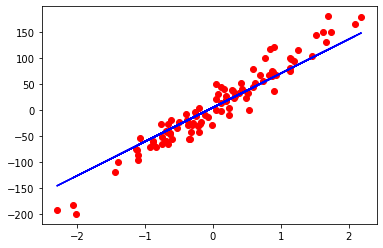

In [129]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features = 1, noise = 20, random_state = 1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. define loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backard pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if(epoch + 1 % 10 == 0):
        [w,b] = model.parameters()
        print(f'epoch: {epoch+1}, weight: {w[0][0].item():.3f}, loss: {loss.item():.4f}')
        
# plot 
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


# Tutorial 8 - Logistic Regression
---
1. Design model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop 
     - forward pass: compute prediction
     - backward pass: gradients
     - update weights

In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# 0) prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
# 569 samples, 30 features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# scale features
sc = StandardScaler() # ensures all features have mean = 0, univariance. This is recommended for logistic regression
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors to make them into column vectors
y_train = y_train.view(-1,1)
y_test = y_test.view(-1,1)

In [5]:
# 1) model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

In [6]:
# 2) loss and optimizer
learning_rate = 0.01

criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [7]:
# 3) training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    # print some information
    if (epoch + 1)%10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.5060
epoch: 20, loss = 0.4360
epoch: 30, loss = 0.3881
epoch: 40, loss = 0.3527
epoch: 50, loss = 0.3254
epoch: 60, loss = 0.3035
epoch: 70, loss = 0.2855
epoch: 80, loss = 0.2703
epoch: 90, loss = 0.2573
epoch: 100, loss = 0.2459


In [9]:
# evaluation of model
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()   # this rounds the sigmoid values between 0 and 1 to just be 0 or 1
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.8860


# Tutorial 9 - Dataset & DataLoader
---
Some important terminology: <br>
**Epoch**: 1 forward and backward pass of ALL training samples <br>
**Batch size**: Number of training samples in one forward and backward pass <br>
**Number of iterations**: Number of passes, each pass using "batch_size" number of samples <br>
*e.g. 100 samples, batch_size= 20 --> 100/20 = 5 iterations for 1 epoch*

In [10]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

In [11]:
# custom dataset
class WineDataset(Dataset):
    
    def __init__(self):
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1 
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
        
    def __len__(self):
        return self.n_samples

In [12]:
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [14]:
# using data loader
dataloader = DataLoader(dataset = dataset, batch_size = 4, shuffle = True)

# creating an iterator
dataiter = iter(dataloader)
data = dataiter.next()
features, labels = data
print(features, labels)

tensor([[1.3580e+01, 2.5800e+00, 2.6900e+00, 2.4500e+01, 1.0500e+02, 1.5500e+00,
         8.4000e-01, 3.9000e-01, 1.5400e+00, 8.6600e+00, 7.4000e-01, 1.8000e+00,
         7.5000e+02],
        [1.3860e+01, 1.3500e+00, 2.2700e+00, 1.6000e+01, 9.8000e+01, 2.9800e+00,
         3.1500e+00, 2.2000e-01, 1.8500e+00, 7.2200e+00, 1.0100e+00, 3.5500e+00,
         1.0450e+03],
        [1.3490e+01, 1.6600e+00, 2.2400e+00, 2.4000e+01, 8.7000e+01, 1.8800e+00,
         1.8400e+00, 2.7000e-01, 1.0300e+00, 3.7400e+00, 9.8000e-01, 2.7800e+00,
         4.7200e+02],
        [1.1460e+01, 3.7400e+00, 1.8200e+00, 1.9500e+01, 1.0700e+02, 3.1800e+00,
         2.5800e+00, 2.4000e-01, 3.5800e+00, 2.9000e+00, 7.5000e-01, 2.8100e+00,
         5.6200e+02]]) tensor([[3.],
        [1.],
        [2.],
        [2.]])


In [17]:
# dummy training loop 
num_epochs = 2
total_samples = len(dataset)
n_iterations =math.ceil(total_samples / 4)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader):
        # forward pass
        if (i+1)%5 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs = {inputs.shape}')

epoch 1/2, step 5/45, inputs = torch.Size([4, 13])
epoch 1/2, step 10/45, inputs = torch.Size([4, 13])
epoch 1/2, step 15/45, inputs = torch.Size([4, 13])
epoch 1/2, step 20/45, inputs = torch.Size([4, 13])
epoch 1/2, step 25/45, inputs = torch.Size([4, 13])
epoch 1/2, step 30/45, inputs = torch.Size([4, 13])
epoch 1/2, step 35/45, inputs = torch.Size([4, 13])
epoch 1/2, step 40/45, inputs = torch.Size([4, 13])
epoch 1/2, step 45/45, inputs = torch.Size([2, 13])
epoch 2/2, step 5/45, inputs = torch.Size([4, 13])
epoch 2/2, step 10/45, inputs = torch.Size([4, 13])
epoch 2/2, step 15/45, inputs = torch.Size([4, 13])
epoch 2/2, step 20/45, inputs = torch.Size([4, 13])
epoch 2/2, step 25/45, inputs = torch.Size([4, 13])
epoch 2/2, step 30/45, inputs = torch.Size([4, 13])
epoch 2/2, step 35/45, inputs = torch.Size([4, 13])
epoch 2/2, step 40/45, inputs = torch.Size([4, 13])
epoch 2/2, step 45/45, inputs = torch.Size([2, 13])


# Tutorial 10 - Dataset Transformations
## torchvision.transforms
---

In [19]:
import torch
import torchvision

In [28]:
# custom dataset with transformations
class WineDataset(Dataset):
    
    def __init__(self, transform = None):
        # data loading
        xy = np.loadtxt('./wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]] # n_samples, 1 
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
        
    def __len__(self):
        return self.n_samples


In [29]:
# custom transformation class 1

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

In [30]:
# applying our custom transform to dataset
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))

<class 'torch.Tensor'> <class 'torch.Tensor'>


In [31]:
# custom transformation class 2
class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, target = sample
        inputs *= self.factor
        return inputs, target

In [36]:
# applying compose transform
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform = composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03]) tensor([1.])


# Tutorial 11 - Softmax & Cross Entropy
---

## The softmax layer
Softmax is a function used to squash values into probabilities from 0 to 1, where all of the softmax outputs sum up to 1

In [38]:
import torch
import torch.nn as nn
import numpy as np

# softmax in numpy
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy: ', outputs)

softmax numpy:  [0.65900114 0.24243297 0.09856589]


In [40]:
# softmax in pytorch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

tensor([0.6590, 0.2424, 0.0986])


## Cross-Entropy
The softmax layer is usually combined with cross-entropy to calculate loss from the predictions made by softmax. <br>
This measures the performance of our classification model, and can be used in multi-class models <br>
The closer the prediction, the lower the cross-entropy loss. <br>
> Note: Class labels must be One-Hot Encoded. e.g. if you have three categories of a class, you must encode them as [1,0,0]

In [41]:
# cross-entropy in numpy
def cross_entropy(actual, predicted):
    loss = -np.sum(actual * np.log(predicted))
    return loss

Y = np.array([1,0,0])

# y_pred has probabilities
y_pred_good = np.array([.7, .2, .1])
y_pred_bad = np.array([.1, .3, .6])
l1 = cross_entropy(Y, y_pred_good)
l2 = cross_entropy(Y, y_pred_bad)

print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

Loss1 numpy: 0.3567
Loss2 numpy: 2.3026


In [45]:
# cross-entropy in pytorch
loss = nn.CrossEntropyLoss()
# careful! cross entropy loss applies nn.LogSoftmax + nn.NLLLoss
# Y has class labels, not one hot
# Y_pred has raw scores (logits), no softmax
Y = torch.tensor([0])
# nsamples x nclasses = 1 x 3 = 3
Y_pred_good = torch.tensor([[2.0, 1.0, 0.1]])
Y_pred_bad = torch.tensor([[0.5, 2.0, 0.3]])

# compute loss
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f'Loss1 pytorch: {l1:.4f}')
print(f'Loss2 pytorch: {l2:.4f}')

Loss1 pytorch: 0.4170
Loss2 pytorch: 1.8406


In [46]:
# get actual predictions
_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad, 1)

print(f'Pred 1: {prediction1}')
print(f'Pred 2: {prediction2}')

Pred 1: tensor([0])
Pred 2: tensor([1])


## Typical neural net with softmax
input layer -> hidden layers -> linear layer -> softmax layer

In [47]:
# Binary classification
class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet1, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # sigmoid at the end
        y_pred = torch.sigmoid(out)
        return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss()

In [48]:
# Multiclass problem
class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss()  # (applies Softmax)

# Tutorial 12 - Activation Functions
---
Activation functions apply a non-linear transformation and decide whether a neuron should be activated or not. <br>
> Without activation functions our network is basically just a stacked linear regression model <br>
After each layer we typically use an activation function for the network to learn better

## Most popular activation functions
1. **Step function**
- f(x) = 1  if x >= theta where theta is a threshold, f(x) = 0 otherwise
- Not used in practice
2. **Sigmoid**
- f(x)= 1 / 1 + e^-x
- Will output a probability between 0 and 1
- Usually used in the last layer of a binary classification problem
3. **TanH**
- f(x) = (2 / 1 + e^-2x) - 1
- Used in hidden layers
4. **ReLU**
- f(x) = max(0, x)
- If you don't know what to use, just use ReLU for hidden layers
5. **Leaky ReLU**
- f(x) = x if x >= 0, f(x) = a*x otherwise
- Improved version of ReLU. Tries to solve the vanishing gradient problem
6. **Softmax**
- S(yi) = e^yi / sum(e^yi) 
- Good in last layer in multi class classification problems

## Using activation functions in pytorch
### Option 1: Creating nn modules

In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [50]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
        

### Option 2: Use activations directly in forward pass

In [51]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out
        

# Tutorial 13 - Feed-Forward Neural Net
---
Here we will create a neural network capable of digit classification using the MNIST dataset <br>
This will use a lot of previous concepts, such as <br>
1. DataLoader, Transformation
2. Multilayer Neural Net, activation functions
3. Loss and optimizer
4. Training loop (batch training)
5. Model evaluation

In [53]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [62]:
# device config
device = torch.device('cpu')

In [55]:
# hyperparameters
input_size = 784 # images are sized 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [ ]:
# import MNIST data
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
                                           transform=transforms.ToTensor(), download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
                                           transform=transforms.ToTensor())

In [57]:
# create dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size = batch_size,
                                          shuffle = False)

examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


Above, we can see the samples shape as follows: 100 samples, 1 color channel, 28 pixels wide, 28 pixes long. <br>
The labels shape is 100 because each sample has a label.

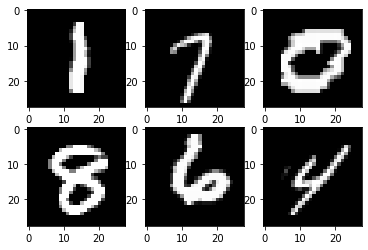

In [58]:
# plot data
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [59]:
# create the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes)

In [60]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()     # this will apply the softmax for us
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [63]:
# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # images are 100,1,28,28
        # input size is 784
        # needs to be 100,784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # print loss
        if (i+1)%100 == 0:
            print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
            
# testing and evaluation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        
        # torch.max returns value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

epoch 1/2, step 100/600, loss = 0.3827
epoch 1/2, step 200/600, loss = 0.3494
epoch 1/2, step 300/600, loss = 0.2614
epoch 1/2, step 400/600, loss = 0.2013
epoch 1/2, step 500/600, loss = 0.3107
epoch 1/2, step 600/600, loss = 0.2075
epoch 2/2, step 100/600, loss = 0.2530
epoch 2/2, step 200/600, loss = 0.2593
epoch 2/2, step 300/600, loss = 0.2215
epoch 2/2, step 400/600, loss = 0.1483
epoch 2/2, step 500/600, loss = 0.1287
epoch 2/2, step 600/600, loss = 0.1459
accuracy = 95.27


# Tutorial 14 - Convolutional Neural Net (CNN)
---
Here we will create a convolutional neural network capable of classification using the CIFAR-10 dataset <br>
- Conv nets mainly work on image data and apply convolutional filters, pooling layers
- These layers are used to learn features from images

## Max Pooling
- Max pooling is used to downsample an image by applying a max filter to subregions
- In each subregion, write the maximum value into the output value

### Convolutional Layer calculation
To find the size of a resulting image after applying a convolutional layer, use <br>
(W-F + 2P) / S + 1 <br>
where: <br>
- W = input image width
- F = filter size
- P = padding
- S = stride

In [73]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [65]:
# device config
device = torch.device('cpu')

In [66]:
# hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [ ]:
# the dataset has PILImage images of range [0,1]
# we transform them to tensors of normalized range [-1,1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

In [68]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [78]:
# creating the cnn
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [79]:
model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [80]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

C:\Users\tomas\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/4], Step [2000/12500], Loss: 2.3342
Epoch [1/4], Step [4000/12500], Loss: 2.2990
Epoch [1/4], Step [6000/12500], Loss: 2.3011
Epoch [1/4], Step [8000/12500], Loss: 2.3143
Epoch [1/4], Step [10000/12500], Loss: 2.1624
Epoch [1/4], Step [12000/12500], Loss: 2.1353
Epoch [2/4], Step [2000/12500], Loss: 1.9660
Epoch [2/4], Step [4000/12500], Loss: 1.7241
Epoch [2/4], Step [6000/12500], Loss: 2.3641
Epoch [2/4], Step [8000/12500], Loss: 1.8526
Epoch [2/4], Step [10000/12500], Loss: 2.4183
Epoch [2/4], Step [12000/12500], Loss: 1.7807
Epoch [3/4], Step [2000/12500], Loss: 1.9311
Epoch [3/4], Step [4000/12500], Loss: 1.7577
Epoch [3/4], Step [6000/12500], Loss: 1.4438
Epoch [3/4], Step [8000/12500], Loss: 1.2325
Epoch [3/4], Step [10000/12500], Loss: 1.6902
Epoch [3/4], Step [12000/12500], Loss: 0.9487
Epoch [4/4], Step [2000/12500], Loss: 1.2107
Epoch [4/4], Step [4000/12500], Loss: 1.6800
Epoch [4/4], Step [6000/12500], Loss: 1.9871
Epoch [4/4], Step [8000/12500], Loss: 2.3231
Epoc

In [81]:
print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Finished Training
Accuracy of the network: 45.66 %
Accuracy of plane: 68.5 %
Accuracy of car: 71.1 %
Accuracy of bird: 25.0 %
Accuracy of cat: 22.9 %
Accuracy of deer: 48.1 %
Accuracy of dog: 45.2 %
Accuracy of frog: 46.7 %
Accuracy of horse: 47.1 %
Accuracy of ship: 32.4 %
Accuracy of truck: 49.6 %
